In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_json(r"C:\Users\Batia\Downloads\ei_2022_12_31(1).json")

In [6]:
lytis=[]
for i in df['eismoDalyviai']:
    try:
        lytis.append(i[0]['lytis'])
    except:
        lytis.append(None)

df['lytis'] = lytis

In [7]:
columns_to_encode = ['registrokodas', 'dataLaikas', 'registravimoData',
       'paskutinioRedagavimoLaikas', 'rusis', 'schema1', 'schema2',
       'policijosIstaigaL1', 'policijosIstaigaL2', 'iforminusiIstaigaL1',
       'iforminusiIstaigaL2', 'ivykioVieta', 'vietosSavivaldybeTipas',
       'savivaldybe', 'gatve', 'namas', 'kitaGatveSankryzoje',
       'kelioPavadinimas', 'kelioReiksme', 'dangosRusis', 'dangosBukle',
       'parosMetas', 'kelioApsvietimas', 'meteoSalygos', 'kitosOroSalygos',
       'kelioGatvesKreive', 'nuliamentisVeiksnys', 'kitiNuliamentysVeiksniai',
       'atitvarai', 'sankryzosTipas', 'kelioElementas1', 'kelioElementas2',
       'neblaivusKaltininkai', 'apsvaigeKaltininkai',
       'atsisakeTikrintisKaltininkai', 'eismoDalyviai', 'eismoTranspPreimone', 'lytis']


for col in columns_to_encode:
    df[col] = df[col].apply(lambda x: str(x) if isinstance(x, list) else x)

df[columns_to_encode] = df[columns_to_encode].apply(LabelEncoder().fit_transform)

In [8]:
df['rusis1'] = df['rusis'].apply(lambda x: 1 if x == 8 else 0)

In [9]:
df['rusis1'].value_counts()

rusis1
0    18586
1     4934
Name: count, dtype: int64

In [15]:
df = df[df['lytis'] != 2]


print(df['lytis'].value_counts())

lytis
1    14551
0     5783
Name: count, dtype: int64


c:\Users\Batia\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Batia\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: title={'center': 'Correlation with rusis1'}>

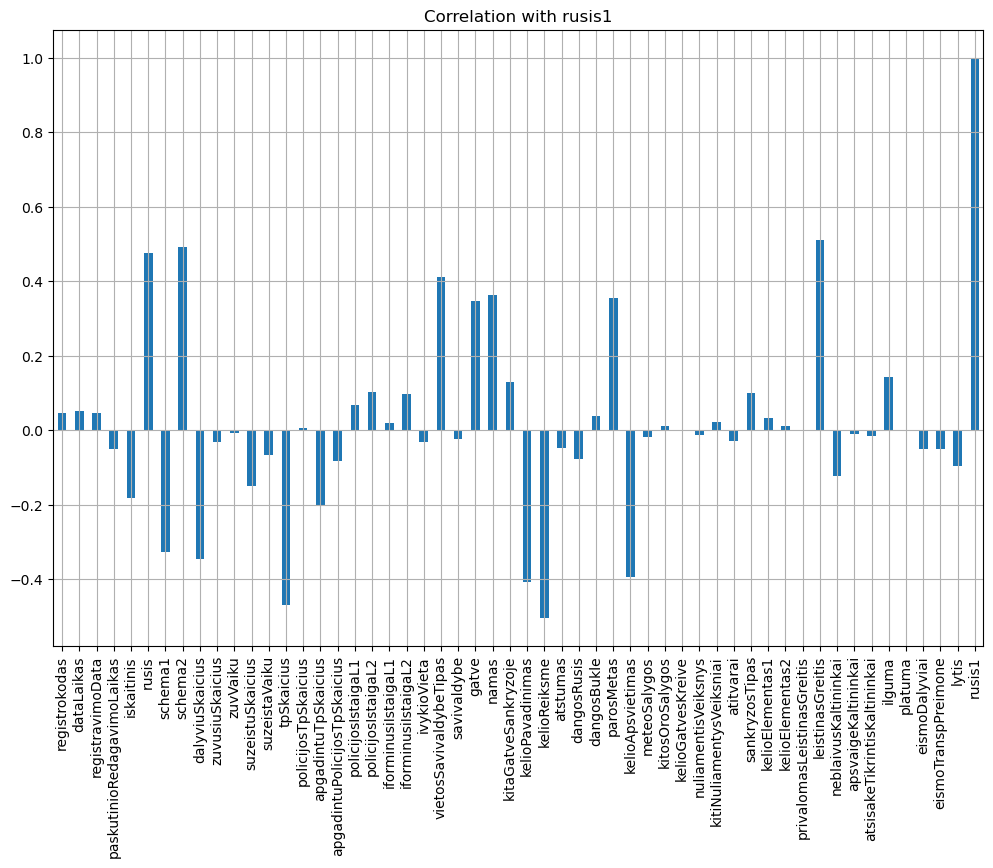

In [10]:
df.corrwith(df['rusis1']).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with rusis1")

0.8290816326530612
[[3561  160]
 [ 644  339]]


c:\Users\Batia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


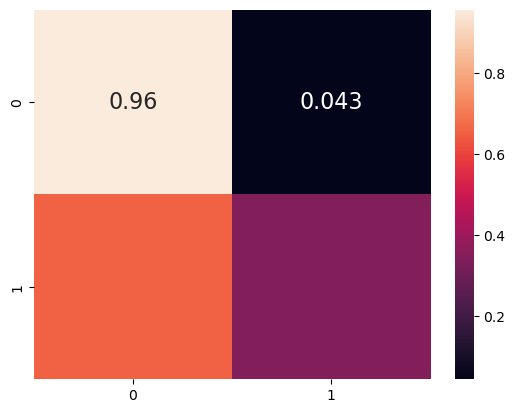

In [13]:
from sklearn.impute import SimpleImputer

X = df.drop(columns=['rusis1', 'rusis'])
y = df['rusis1']


imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.show()

0.7214162773543152
[[  24 1108]
 [  25 2910]]


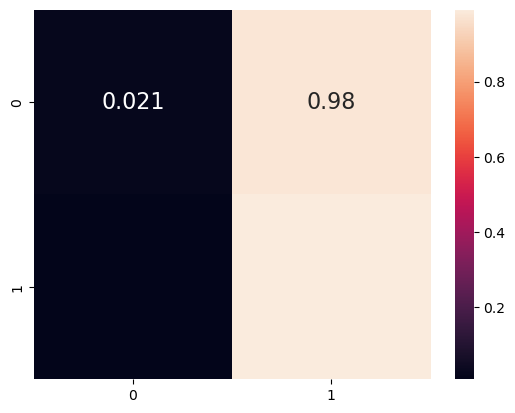

In [26]:
X = df.drop(columns=['lytis', 'rusis1', 'rusis', 'eismoDalyviai', 'eismoTranspPreimone'])
y = df['lytis']


imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train = pd.DataFrame(X_train, columns=df.columns[:-4])
# X_test = pd.DataFrame(X_test, columns=df.columns[:-4])

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.show()

0.7142857142857143
[[  84 1048]
 [ 114 2821]]


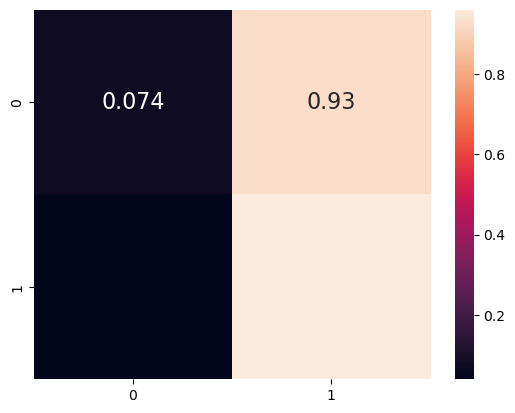

In [28]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['lytis', 'rusis1', 'rusis', 'eismoDalyviai', 'eismoTranspPreimone'])
y = df['lytis']


imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.show()



In [21]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\Batia\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


c:\Users\Batia\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7223998032948119
[[   5 1127]
 [   2 2933]]


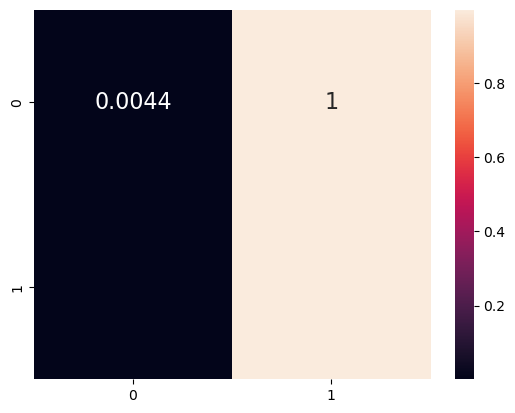

In [23]:
X = df.drop(columns=['lytis', 'rusis1', 'rusis', 'eismoDalyviai', 'eismoTranspPreimone'])
y = df['lytis']


imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rfc = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features='auto')

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.show()



In [29]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

In [30]:
X = dataset[:, 1:2].astype(int) # 1 stulpelis, visos eilutės kaip X -
#   ↪ features set'as
print(X)
y = dataset[:, 2].astype(int)
# print y - labels
print(y)
# import the regressor
from sklearn.tree import DecisionTreeRegressor
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)
# fit the regressor with X and Y data
regressor.fit(X, y)
# predicting a new value
# test the output by changing values, like 3750
y_pred = regressor.predict([[3750]])
# print the predicted price
print("Predicted price: % d\n"% y_pred)

[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]
[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]
Predicted price:  8000



C:\Users\Batia\AppData\Local\Temp\ipykernel_44932\1799096218.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted price: % d\n"% y_pred)


In [31]:
X

array([[  100],
       [  500],
       [ 1500],
       [ 3500],
       [ 5000],
       [ 6000],
       [ 8000],
       [ 9500],
       [12000],
       [14000],
       [15500],
       [16500],
       [25000],
       [30000]])

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score


In [33]:
regressor = DecisionTreeRegressor(random_state=0)

In [34]:
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [36]:
y_pred = regressor.predict([[3750]])
print(y_pred)

[8000.]


C:\Users\Batia\AppData\Local\Temp\ipykernel_44932\1933184511.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


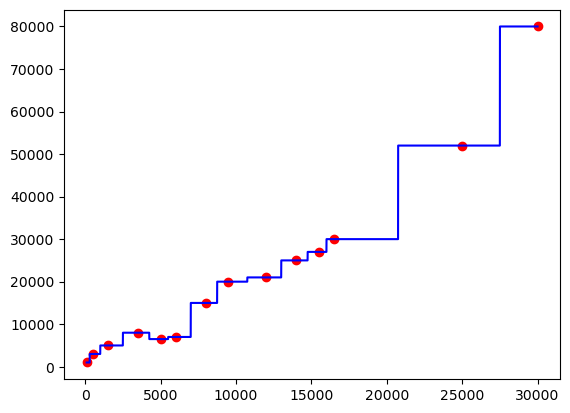

In [38]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.show()

In [39]:
y_pred = regressor.predict(X)
accuracy_score(y, y_pred)

1.0

In [40]:
from sklearn.tree import export_graphviz
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',
feature_names =['Production Cost'])

In [ ]:
# Sprendžiama problema: Savaitgalio veiklos pasirinkimas
# Sprendimo taškai:
# • Orai: Ar bus saulėta, ar lietinga?
# • Energingumo lygis: Ar jaučiatės energingi, ar pavargę?
# • Kompanija: Ar draugai gali prisijungti?
# Sprendimų medžiui sukurti naudokite draw.io

In [ ]:
# Tiesinės regresijos ir sprendimų medžio (regresoriaus) palyginimas : 
# paimkite savo darytą automobilių bei butų (pardavimui)  kainos spėjimo algoritmą su linijine regresija,
# tuos pačius duomenis pateikite DecissionTreeRegressor(). 
# Abiem atvejais paskaičiuokite accuracy_score, patestuokite su 2-5 vartotojo įvestimis. 
# Kuris modelis davė tikslesnius rezultatus?

In [ ]:
# Antra - logistinės regresijos ir sprendimų medžio (classsifier) palyginimas - paimkite savo ankstesnį kodą,
# skirtą nustatyti, ar eismo įvykis buv su gyvūnu, ar ne, atliktą su logistine regresija. 
# Pritaikykite DecisionTreeClassifier(). paskaičiuokite accuracy_score abiems atvejams. 
# Vizualizuokite comfusiom matrix abiems atvejams.
# Patestuokite su keliais konkrečiais atvejais. Kuris modelis spėdavo geriau?

In [41]:
import sqlite3

conn = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\cars1.db")
c = conn.cursor()

c.execute("select * from car_listings")

data = c.fetchall()

df = pd.DataFrame(data)


In [42]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,BMW,428 Gran Coupe,18 000 €,Privatus pardavėjas,"Klaipėda, Lietuva",+37068744028,2015,199 000 km,"1997 cm³, 245 AG (180kW)",Benzinas,Kupė (Coupe),4/5,Automatinė,Balta,,,5,~ 147 g/km
1,BMW,530,26 900 €,Privatus pardavėjas,"Klaipėda, Lietuva",+37067780732,2019,46 000 km,"1998 cm³, 252 AG (185kW)",Benzinas,Sedanas,4/5,Automatinė,Pilka / sidabrinė,2026-07,R20,5,~ 126 g/km
2,Volkswagen,Golf,7 100 €,Privatus pardavėjas,"Alytus, Lietuva",+37068875994,2014-03,314 086 km,"1598 cm³, 105 AG (77kW)",Dyzelinas,Universalas,4/5,Automatinė,,,R16,5,104 g/km
3,Fiat,500X,10 500 €,Privatus pardavėjas,"Kaunas, Lietuva",+37068731000,2016,126 211 km,"2360 cm³, 177 AG (130kW)",Benzinas / dujos,Visureigis / Krosoveris,4/5,Automatinė,Pilka / sidabrinė,2026-10,R18,5,
4,BMW,320 Gran Turismo,14 500 €,Privatus pardavėjas,"Kėdainiai, Lietuva",+37064227171,2016-06,162 000 km,"1995 cm³, 190 AG (140kW)",Dyzelinas,Hečbekas,4/5,Mechaninė,Juoda,2025-09,,5,120 g/km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,Hyundai,i20,2 850 €,Pardavėjas,"Tauragė, Lietuva",+37066448825,2013-03,192 000 km,"1120 cm³, 75 AG (55kW)",Dyzelinas,Hečbekas,4/5,Mechaninė,Balta,,,5,~ 99 g/km
6189,Citroen,DS3,2 850 €,Pardavėjas,"Ukmergė, Lietuva",+37066387557,2015-03,89 652 km,"1560 cm³, 116 AG (85kW)",Dyzelinas,Hečbekas,2/3,Mechaninė,,,,5,99 g/km
6190,Volkswagen,Touran,2 850 €,Pardavėjas,"Kaišiadorys, Lietuva",+37060029637,2007-12,320 321 km,"1900 cm³, 105 AG (77kW)",Dyzelinas,Vienatūris,4/5,Mechaninė,Mėlyna / žydra,2025-02,,5,131 g/km
6191,Toyota,Auris,2 890 €,"AUTOLYGIS, UAB","Klaipėda, Lietuva",+37068788729,2007-05,290 000 km,"1364 cm³, 88 AG (65kW)",Dyzelinas,Hečbekas,4/5,Mechaninė,Pilka / sidabrinė,2026-09,R16,5,


In [43]:
import pandas as pd
import sqlite3

db_file_path = r'C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\cars1.db'
conn = sqlite3.connect(db_file_path)


df_cars = pd.read_sql_query("select * from car_listings", conn)

print("Cars DataFrame:")
print(df_cars.head())

conn.close()

Cars DataFrame:
        brand             model     price               seller  \
0         BMW    428 Gran Coupe  18 000 €  Privatus pardavėjas   
1         BMW               530  26 900 €  Privatus pardavėjas   
2  Volkswagen              Golf   7 100 €  Privatus pardavėjas   
3        Fiat              500X  10 500 €  Privatus pardavėjas   
4         BMW  320 Gran Turismo  14 500 €  Privatus pardavėjas   

             location         phone registration_year     mileage  \
0   Klaipėda, Lietuva  +37068744028              2015  199 000 km   
1   Klaipėda, Lietuva  +37067780732              2019   46 000 km   
2     Alytus, Lietuva  +37068875994           2014-03  314 086 km   
3     Kaunas, Lietuva  +37068731000              2016  126 211 km   
4  Kėdainiai, Lietuva  +37064227171           2016-06  162 000 km   

                     engine         fuel_type                body_type doors  \
0  1997 cm³, 245 AG (180kW)          Benzinas             Kupė (Coupe)   4/5   
1  1998 cm³,

In [44]:
df_cars

,brand,model,price,seller,location,phone,registration_year,mileage,engine,fuel_type,body_type,doors,transmission,color,tech_check,wheel_size,seats,co2_emission
0,BMW,428 Gran Coupe,18 000 €,Privatus pardavėjas,"Klaipėda, Lietuva",+37068744028,2015,199 000 km,"1997 cm³, 245 AG (180kW)",Benzinas,Kupė (Coupe),4/5,Automatinė,Balta,,,5,~ 147 g/km
1,BMW,530,26 900 €,Privatus pardavėjas,"Klaipėda, Lietuva",+37067780732,2019,46 000 km,"1998 cm³, 252 AG (185kW)",Benzinas,Sedanas,4/5,Automatinė,Pilka / sidabrinė,2026-07,R20,5,~ 126 g/km
2,Volkswagen,Golf,7 100 €,Privatus pardavėjas,"Alytus, Lietuva",+37068875994,2014-03,314 086 km,"1598 cm³, 105 AG (77kW)",Dyzelinas,Universalas,4/5,Automatinė,,,R16,5,104 g/km
3,Fiat,500X,10 500 €,Privatus pardavėjas,"Kaunas, Lietuva",+37068731000,2016,126 211 km,"2360 cm³, 177 AG (130kW)",Benzinas / dujos,Visureigis / Krosoveris,4/5,Automatinė,Pilka / sidabrinė,2026-10,R18,5,
4,BMW,320 Gran Turismo,14 500 €,Privatus pardavėjas,"Kėdainiai, Lietuva",+37064227171,2016-06,162 000 km,"1995 cm³, 190 AG (140kW)",Dyzelinas,Hečbekas,4/5,Mechaninė,Juoda,2025-09,,5,120 g/km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,Hyundai,i20,2 850 €,Pardavėjas,"Tauragė, Lietuva",+37066448825,2013-03,192 000 km,"1120 cm³, 75 AG (55kW)",Dyzelinas,Hečbekas,4/5,Mechaninė,Balta,,,5,~ 99 g/km
6189,Citroen,DS3,2 850 €,Pardavėjas,"Ukmergė, Lietuva",+37066387557,2015-03,89 652 km,"1560 cm³, 116 AG (85kW)",Dyzelinas,Hečbekas,2/3,Mechaninė,,,,5,99 g/km
6190,Volkswagen,Touran,2 850 €,Pardavėjas,"Kaišiadorys, Lietuva",+37060029637,2007-12,320 321 km,"1900 cm³, 105 AG (77kW)",Dyzelinas,Vienatūris,4/5,Mechaninė,Mėlyna / žydra,2025-02,,5,131 g/km
6191,Toyota,Auris,2 890 €,"AUTOLYGIS, UAB","Klaipėda, Lietuva",+37068788729,2007-05,290 000 km,"1364 cm³, 88 AG (65kW)",Dyzelinas,Hečbekas,4/5,Mechaninė,Pilka / sidabrinė,2026-09,R16,5,


In [ ]:
# import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")
# print("Path to dataset files:", path)

# UŽDUOTIS _ Aptikti sukčiavimą (fraud)

# Stulpelių reikšmės:

# type: type of online transaction
# amount: the amount of the transaction
# nameOrig: customer starting the transaction
# oldbalanceOrg: balance before the transaction
# newbalanceOrig: balance after the transaction
# nameDest: recipient of the transaction
# oldbalanceDest: initial balance of recipient before the transaction
# newbalanceDest: the new balance of recipient after the transaction
# isFraud: fraud transaction

In [45]:
import kagglehub
# # Download latest version
path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")
print("Path to dataset files:", path)

100%|██████████| 178M/178M [00:15<00:00, 12.1MB/s] 


Extracting files...
Path to dataset files: C:\Users\Batia\.cache\kagglehub\datasets\jainilcoder\online-payment-fraud-detection\versions\1


In [51]:
import os
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['onlinefraud.csv']


In [53]:
csv_file = [file for file in files if file.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, csv_file))

In [54]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [55]:
df = pd.read_csv(path+"\onlinefraud.csv"); df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
df['type'] = LabelEncoder().fit_transform(df['type'])
df['nameOrig'] = LabelEncoder().fit_transform(df['nameOrig'])
df['nameDest'] = LabelEncoder().fit_transform(df['nameDest'])
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


0.9997170976735998
[[1270888      16]
 [    344    1276]]


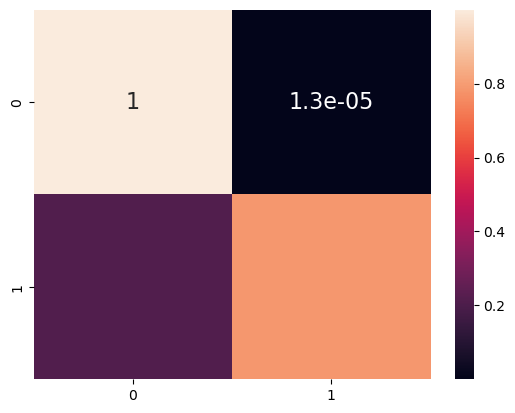

In [58]:
X = df.drop(columns=['isFraud'])
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)